# dankNodes

### Importing all libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import csv
import os
import json

### Reading the data and making network

In [4]:
df = pd.read_csv('header.csv')
print(len(df))

2626979


In [22]:
G = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr=None, create_using=nx.DiGraph, edge_key=None)
# print("isConnected: ", nx.is_connected(G))
print("size: ", nx.number_of_nodes(G))
print("size: ", nx.number_of_edges(G))
print(nx.is_directed(G))

size:  530297
size:  2626979
True


### Extracting Node Attributes from user.json

In [23]:
f = open('user.json')
data = json.load(f)
f.close()
print(len(data))

1000000


In [24]:
for user in data:
    if user['id'] not in G.nodes:
        continue
    G.nodes[user['id']]['name'] = user['name']
    G.nodes[user['id']]['username'] = user['username']
    G.nodes[user['id']]['followers_count'] = user['public_metrics']['followers_count']
    G.nodes[user['id']]['following_count'] = user['public_metrics']['following_count']
    G.nodes[user['id']]['tweet_count'] = user['public_metrics']['tweet_count']
    G.nodes[user['id']]['is_verified'] = user['verified']
    G.nodes[user['id']]['bot'] = False


In [25]:
# testing the graph
G.nodes["u1234204463130431489"]

{'name': 'sarin',
 'username': 'sariisaaa',
 'followers_count': 792,
 'following_count': 209,
 'tweet_count': 9447,
 'is_verified': False,
 'bot': False}

### Plots

In [40]:
degree = dict(G.degree())
degree_values = [degree.get(node, 0) for node in G.nodes()]

#### Reciprocity vs Degree Relationship

In [1]:
import collections
import numpy as np

# Calculate reciprocity and degree for each node
reciprocity = nx.reciprocity(G, nodes=G.nodes())
degree = dict(G.degree())

# Group nodes by degree and calculate average reciprocity for each group
degree_reciprocity = collections.defaultdict(list)
for node in G.nodes():
    degree_reciprocity[degree[node]].append(reciprocity[node])

avg_reciprocity = {degree: np.mean(reciprocity_values) for degree, reciprocity_values in degree_reciprocity.items()}

# Extract degrees and average reciprocities
degrees = list(avg_reciprocity.keys())
avg_reciprocity_values = list(avg_reciprocity.values())

print(len(degrees), len(avg_reciprocity_values))
# Plot average reciprocity vs. degree
plt.figure(figsize=(10, 6))
# plt.plot(degrees, avg_reciprocity_values, color='red', linestyle='-', linewidth=2)
plt.plot(degrees, avg_reciprocity_values, color='blue', alpha=0.5)

plt.title('Average Reciprocity vs. Degree')
plt.xlabel('Degree')
plt.ylabel('Average Reciprocity')
plt.grid(True)
plt.show()

NameError: name 'nx' is not defined

#### Clustering vs Degree Relationship

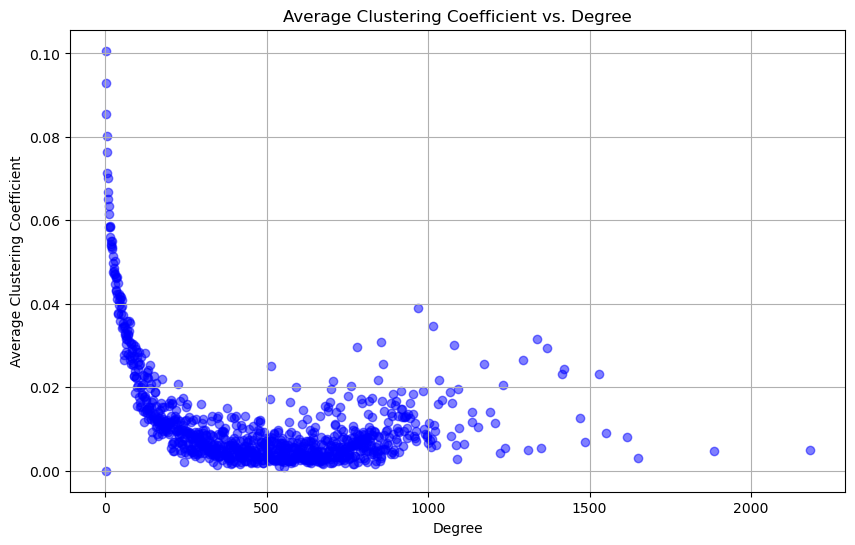

In [33]:
import collections

# Calculate clustering coefficient and degree for each node
clustering = nx.clustering(G)
degree = dict(G.degree())

# Group nodes by degree and calculate average clustering coefficient for each group
degree_clustering = collections.defaultdict(list)
for node in G.nodes():
    degree_clustering[degree[node]].append(clustering[node])

avg_clustering = {degree: np.mean(clustering_values) for degree, clustering_values in degree_clustering.items()}

# Extract degrees and average clustering coefficients
degrees = list(avg_clustering.keys())
avg_clustering_values = list(avg_clustering.values())

# Plot average clustering coefficient vs. degree
plt.figure(figsize=(10, 6))
plt.scatter(degrees, avg_clustering_values, color='blue', alpha=0.5)
plt.title('Average Clustering Coefficient vs. Degree')
plt.xlabel('Degree')
plt.ylabel('Average Clustering Coefficient')
plt.grid(True)
plt.show()